In [27]:
# Import basic libraries
import pandas as pd
import numpy as np
import io
import os
import sys
import requests

In [28]:
# Import Technical Application and Wavelet denoising functions
from pre_processing import ta_features as ta
from pre_processing import wavelet_fx as denoise

In [29]:
# Import neural network libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import BatchNormalization
from keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
# Import Graph libraries
import matplotlib.pyplot as plt

In [31]:
def import_historical_dataframes_from_folder(folder_path):
    """
    Imports all CSV files from a folder with separator='\t' and returns a dictionary of dataframes.

    Parameters:
    folder_path (str): The path to the folder containing the CSV files.

    Returns:
    dict: A dictionary mapping CSV file names to their corresponding dataframes.
    """
    dataframes = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            filepath = os.path.join(folder_path, filename)
            df_name = filename[:-4]  # remove .csv extension from filename
            df = pd.read_csv(filepath, sep='\t')
            df = df.rename(columns = {'<DATE>':'Date','<OPEN>':'open', '<HIGH>':'high', '<LOW>':'low', '<CLOSE>':'close','<TICKVOL>':'tickvol','<VOL>':'volume','<SPREAD>':'spread'})
            df = df.drop(columns=['<TIME>'])

            # Keep only the last 1000 values
            df = df.tail(1000)

            dataframes[df_name] = df
    return dataframes

data_M5 = 'data/Historical_Data/5M'
dataframes_M5 = import_historical_dataframes_from_folder(data_M5)

In [32]:
def import_validation_dataframes_from_folder(folder_path):
    """
    Imports all CSV files from a folder with separator='\t' and returns a dictionary of dataframes.

    Parameters:
    folder_path (str): The path to the folder containing the CSV files.

    Returns:
    dict: A dictionary mapping CSV file names to their corresponding dataframes.
    """
    dataframes = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            filepath = os.path.join(folder_path, filename)
            df_name = filename[:-4]  # remove .csv extension from filename
            df = pd.read_csv(filepath, sep='\t')
            df = df.rename(columns = {'<DATE>':'Date','<OPEN>':'open', '<HIGH>':'high', '<LOW>':'low', '<CLOSE>':'close','<TICKVOL>':'tickvol','<VOL>':'volume','<SPREAD>':'spread'})
            df = df.drop(columns=['<TIME>'])
            dataframes[df_name] = df
    return dataframes

validation_data_M5 = 'data/Validation_Data/5M'
validation_dataframes_M5 = import_validation_dataframes_from_folder(validation_data_M5)

In [33]:
print(dataframes_M5.keys())

dict_keys(['EURCHF_M5_202301020005_202304141530', 'EURGBP_M5_202301020005_202304141530', 'EURJPY_M5_202301020005_202304141530', 'EURUSD_M5_202301020005_202304141530', 'GBPCHF_M5_202301020155_202304141530', 'GBPJPY_M5_202301020010_202304141530', 'GBPUSD_M5_202301020005_202304141530', 'USDCHF_M5_202301020010_202304141530', 'USDJPY_M5_202301020005_202304141530'])


In [34]:
print(validation_dataframes_M5.keys())

dict_keys(['EURCHF_M5_202304141535_202304242355', 'EURGBP_M5_202304141535_202304242355', 'EURJPY_M5_202304141535_202304242355', 'EURUSD_M5_202304141535_202304242355', 'GBPCHF_M5_202304141535_202304242355', 'GBPJPY_M5_202304141535_202304242355', 'GBPUSD_M5_202304141535_202304242355', 'USDCHF_M5_202304141535_202304242355', 'USDJPY_M5_202304141535_202304242355'])


In [35]:
import warnings
warnings.filterwarnings('ignore')

data_EURCHF = dataframes_M5['EURCHF_M5_202301020005_202304141530']
data_EURGBP = dataframes_M5['EURGBP_M5_202301020005_202304141530']
data_EURJPY = dataframes_M5['EURJPY_M5_202301020005_202304141530']
data_EURUSD = dataframes_M5['EURUSD_M5_202301020005_202304141530']
data_GBPCHF = dataframes_M5['GBPCHF_M5_202301020155_202304141530']
data_GBPJPY = dataframes_M5['GBPJPY_M5_202301020010_202304141530']
data_GBPUSD = dataframes_M5['GBPUSD_M5_202301020005_202304141530']
data_USDCHF = dataframes_M5['USDCHF_M5_202301020010_202304141530']
data_USDJPY = dataframes_M5['USDJPY_M5_202301020005_202304141530']

ta_data_EURCHF = ta.TA_APPLICATION(data_EURCHF)
ta_data_EURGBP = ta.TA_APPLICATION(data_EURGBP)
ta_data_EURJPY = ta.TA_APPLICATION(data_EURJPY)
ta_data_EURUSD = ta.TA_APPLICATION(data_EURUSD)
ta_data_GBPCHF = ta.TA_APPLICATION(data_GBPCHF)
ta_data_GBPJPY = ta.TA_APPLICATION(data_GBPJPY)
ta_data_GBPUSD = ta.TA_APPLICATION(data_GBPUSD)
ta_data_USDCHF = ta.TA_APPLICATION(data_USDCHF)
ta_data_USDJPY = ta.TA_APPLICATION(data_USDJPY)

In [36]:
def import_historical_dataframes_from_folder(folder_path):
    """
    Imports all CSV files from a folder with separator='\t' and returns a dictionary of dataframes.

    Parameters:
    folder_path (str): The path to the folder containing the CSV files.

    Returns:
    dict: A dictionary mapping CSV file names to their corresponding dataframes.
    """
    dataframes = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            filepath = os.path.join(folder_path, filename)
            df_name = filename[:-4]  # remove .csv extension from filename
            df = pd.read_csv(filepath, sep='\t')
            df = df.rename(columns = {'<DATE>':'Date','<OPEN>':'open', '<HIGH>':'high', '<LOW>':'low', '<CLOSE>':'close','<TICKVOL>':'tickvol','<VOL>':'volume','<SPREAD>':'spread'})
            df = df.drop(columns=['<TIME>'])

            # Keep only the last 1000 values
            df = df.tail(1000)

            dataframes[df_name] = df
    return dataframes

data_M5 = 'data/Historical_Data/5M'
dataframes_M5 = import_historical_dataframes_from_folder(data_M5)

In [37]:
print(dataframes_M5.keys())

dict_keys(['EURCHF_M5_202301020005_202304141530', 'EURGBP_M5_202301020005_202304141530', 'EURJPY_M5_202301020005_202304141530', 'EURUSD_M5_202301020005_202304141530', 'GBPCHF_M5_202301020155_202304141530', 'GBPJPY_M5_202301020010_202304141530', 'GBPUSD_M5_202301020005_202304141530', 'USDCHF_M5_202301020010_202304141530', 'USDJPY_M5_202301020005_202304141530'])


In [38]:
def preprocess_dataframe(data):
    data['open_wave'], data['high_wave'], data['low_wave'], data['close_wave'] = denoise.denoising([data['open'], data['high'], data['low'], data['close']])
    data = data[['open_wave', 'high_wave', 'low_wave', 'close_wave', 'tickvol', 'volume', 'spread']]
    data = ta.TA_WAVE_APPLICATION(data)
    return data

ta_denoised_data_EURCHF = preprocess_dataframe(dataframes_M5['EURCHF_M5_202301020005_202304141530'])
ta_denoised_data_EURGBP = preprocess_dataframe(dataframes_M5['EURGBP_M5_202301020005_202304141530'])
ta_denoised_data_EURJPY = preprocess_dataframe(dataframes_M5['EURJPY_M5_202301020005_202304141530'])
ta_denoised_data_EURUSD = preprocess_dataframe(dataframes_M5['EURUSD_M5_202301020005_202304141530'])
ta_denoised_data_GBPCHF = preprocess_dataframe(dataframes_M5['GBPCHF_M5_202301020155_202304141530'])
ta_denoised_data_GBPJPY = preprocess_dataframe(dataframes_M5['GBPJPY_M5_202301020010_202304141530'])
ta_denoised_data_GBPUSD = preprocess_dataframe(dataframes_M5['GBPUSD_M5_202301020005_202304141530'])
ta_denoised_data_USDCHF = preprocess_dataframe(dataframes_M5['USDCHF_M5_202301020010_202304141530'])
ta_denoised_data_USDJPY = preprocess_dataframe(dataframes_M5['USDJPY_M5_202301020005_202304141530'])

ta_denoised_data_EURCHF = ta.TA_WAVE_APPLICATION(ta_denoised_data_EURCHF)
ta_denoised_data_EURGBP = ta.TA_WAVE_APPLICATION(ta_denoised_data_EURGBP)
ta_denoised_data_EURJPY = ta.TA_WAVE_APPLICATION(ta_denoised_data_EURJPY)
ta_denoised_data_EURUSD = ta.TA_WAVE_APPLICATION(ta_denoised_data_EURUSD)
ta_denoised_data_GBPCHF = ta.TA_WAVE_APPLICATION(ta_denoised_data_GBPCHF)
ta_denoised_data_GBPJPY = ta.TA_WAVE_APPLICATION(ta_denoised_data_GBPJPY)
ta_denoised_data_GBPUSD = ta.TA_WAVE_APPLICATION(ta_denoised_data_GBPUSD)
ta_denoised_data_USDCHF = ta.TA_WAVE_APPLICATION(ta_denoised_data_USDCHF)
ta_denoised_data_USDJPY = ta.TA_WAVE_APPLICATION(ta_denoised_data_USDJPY)

In [39]:
data_EURCHF['price_change'] = data_EURCHF['close'].diff()
volatility = np.std(data_EURCHF['price_change'])
print("Market volatility EURCHF: ", volatility)

Market volatility EURCHF:  0.00021875373995497644


In [40]:
data_EURGBP['price_change'] = data_EURGBP['close'].diff()
volatility = np.std(data_EURGBP['price_change'])
print("Market volatility EURGBP: ", volatility)

Market volatility EURGBP:  0.00016393994612529632


In [41]:
data_EURJPY['price_change'] = data_EURJPY['close'].diff()
volatility = np.std(data_EURJPY['price_change'])
print("Market volatility EURJPY: ", volatility)

Market volatility EURJPY:  0.043877299433690314


In [42]:
data_EURUSD['price_change'] = data_EURUSD['close'].diff()
volatility = np.std(data_EURUSD['price_change'])
print("Market volatility EURUSD: ", volatility)

Market volatility EURUSD:  0.00033927659498881696


In [43]:
data_GBPCHF['price_change'] = data_GBPCHF['close'].diff()
volatility = np.std(data_GBPCHF['price_change'])
print("Market volatility GBPCHF: ", volatility)

Market volatility GBPCHF:  0.00028852852783397


In [44]:
data_GBPJPY['price_change'] = data_GBPJPY['close'].diff()
volatility = np.std(data_GBPJPY['price_change'])
print("Market volatility GBPJPY: ", volatility)

Market volatility GBPJPY:  0.05157738738587033


In [45]:
data_GBPUSD['price_change'] = data_GBPUSD['close'].diff()
volatility = np.std(data_GBPUSD['price_change'])
print("Market volatility GBPUSD: ", volatility)

Market volatility GBPUSD:  0.0003978636458208401


In [46]:
data_USDCHF['price_change'] = data_USDCHF['close'].diff()
volatility = np.std(data_USDCHF['price_change'])
print("Market volatility USDCHF: ", volatility)

Market volatility USDCHF:  0.00029458164558145866


In [47]:
data_USDJPY['price_change'] = data_USDJPY['close'].diff()
volatility = np.std(data_USDJPY['price_change'])
print("Market volatility USDJPY: ", volatility)

Market volatility USDJPY:  0.051424930884829766


**PREDICTION USING PURE DATASET**

In [58]:
from keras.layers import SimpleRNN, Dense, Dropout, GRU, Conv1D, Flatten, MaxPooling1D, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

from keras.layers import SimpleRNN, Dense, Dropout, GRU, Conv1D, Flatten, MaxPooling1D, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Define the LSTM model
def create_forex_lstm_model(input_shape, output_units, hidden_layers, units, dropout_rate):
    model = Sequential()
    
    # Input layer with Batch Normalization
    model.add(LSTM(units, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Hidden layers with Batch Normalization
    for _ in range(hidden_layers - 1):
        model.add(LSTM(units, return_sequences=True))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
    
    # Final hidden layer with Batch Normalization
    model.add(LSTM(units))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(output_units))
    
    model.compile(optimizer='adam', loss='mse')
    return model

def create_rnn_model(input_shape, output_units, hidden_layers, units, dropout_rate):
    model = Sequential()
    model.add(SimpleRNN(units, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    for _ in range(hidden_layers - 1):
        model.add(SimpleRNN(units, return_sequences=True))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
        
    model.add(SimpleRNN(units))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_units))
    
    model.compile(optimizer='adam', loss='mse')
    return model

def create_gru_model(input_shape, output_units, hidden_layers, units, dropout_rate):
    model = Sequential()
    model.add(GRU(units, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    
    for _ in range(hidden_layers - 1):
        model.add(GRU(units, return_sequences=True))
        model.add(Dropout(dropout_rate))
        
    model.add(GRU(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_units))
    
    model.compile(optimizer='adam', loss='mse')
    return model

def create_ffnn_model(input_shape, output_units, hidden_layers, units, dropout_rate):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    
    for _ in range(hidden_layers):
        model.add(Dense(units))
        model.add(Dropout(dropout_rate))
        
    model.add(Dense(output_units))
    
    model.compile(optimizer='adam', loss='mse')
    return model

def create_hybrid_model(input_shape, output_units, model_types, units, dropout_rate):
    model = Sequential()

    model_constructors = {
        "LSTM": LSTM,
        "RNN": SimpleRNN,
        "GRU": GRU,
    }

    for i, model_type in enumerate(model_types):
        if model_type in model_constructors:
            if i == 0:
                model.add(model_constructors[model_type](units, return_sequences=True, input_shape=input_shape))
            else:
                model.add(model_constructors[model_type](units, return_sequences=True))

        elif model_type == "FFNN":
            if i == 0:
                model.add(Flatten(input_shape=input_shape))
                model.add(Dense(units))
            else:
                model.add(Dense(units))
        else:
            raise ValueError("Invalid model type: ", model_type)
            
        model.add(Dropout(dropout_rate))

    if model_types[-1] in model_constructors:
        model.add(model_constructors[model_types[-1]](units, return_sequences=True))
    
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_units))

    model.compile(optimizer='adam', loss='mse')
    return model

**Initizalize Neural Networks**

In [263]:
# Create and train the RNN model

model = create_rnn_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=50, dropout_rate=0.01)


# model = create_rnn_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=2 , units=50, dropout_rate=0.01)
# model = create_rnn_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=50, dropout_rate=0.1)
# model = create_rnn_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=2 , units=50, dropout_rate=0.2)
# model = create_rnn_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=50, dropout_rate=0.3)

# model = create_rnn_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=100, dropout_rate=0.001)
# model = create_rnn_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=2 , units=100, dropout_rate=0.01)
# model = create_rnn_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=100, dropout_rate=0.1)
# model = create_rnn_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=2 , units=100, dropout_rate=0.2)
# model = create_rnn_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=100, dropout_rate=0.3)

# # # Create and train the LSTM model
# model = create_LSTM_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=50, dropout_rate=0.001)
# model = create_LSTM_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=2 , units=50, dropout_rate=0.01)
# model = create_LSTM_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=50, dropout_rate=0.1)
# model = create_LSTM_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=2 , units=50, dropout_rate=0.2)
# model = create_LSTM_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=50, dropout_rate=0.3)

model = create_forex_lstm_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=100, dropout_rate=0.3)

# model = create_LSTM_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=100, dropout_rate=0.001)
# model = create_LSTM_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=2 , units=100, dropout_rate=0.01)
# model = create_LSTM_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=100, dropout_rate=0.1)
# model = create_LSTM_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=2 , units=100, dropout_rate=0.2)
# model = create_LSTM_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=100, dropout_rate=0.3)

# # Create and train the GRU model
# model = create_gru_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=50, dropout_rate=0.001)
# model = create_gru_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=2 , units=50, dropout_rate=0.01)
# model = create_gru_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=50, dropout_rate=0.1)
# model = create_gru_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=2 , units=50, dropout_rate=0.2)
# model = create_gru_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=50, dropout_rate=0.3)

# model = create_gru_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=100, dropout_rate=0.001)
# model = create_gru_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=2 , units=100, dropout_rate=0.01)
# model = create_gru_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=100, dropout_rate=0.1)
# model = create_gru_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=2 , units=100, dropout_rate=0.2)



# model = create_gru_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, hidden_layers=1 , units=100, dropout_rate=0.3)

# # Create and train the Hybrid model

# Best score: -0.396758 with params: {'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 20, 'hidden_layers': 1, 'model_type': 'LSTM', 'units': 100}
# Best score: -0.496311 with params: {'batch_size': 16, 'dropout_rate': 0.01, 'epochs': 20, 'hidden_layers': 1, 'model_type': 'RNN', 'units': 50}
# Best score: -0.110193 with params: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'hidden_layers': 1, 'model_type': 'GRU', 'units': 100}



# model = create_hybrid_model(input_shape=(X_train.shape[1], len(feature_columns)), output_units=future_days, model_types=["FFNN", "LSTM"], units=100, dropout_rate=0.01)

**EURCHF_M5**

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# data = ta_data_EURCHF
# Uncomment for Prediction using Denoised OHLC + TA values 
data = ta_denoised_data_EURCHF

# Window size for tuning
window_size = 28
# Number of future days to predict
future_days = 7

# Set up window for rolling data
def window_data(data, window, feature_col_numbers, target_col_number):
    X = []
    y = []
    for i in range(len(data) - window - future_days):
        features = data.iloc[i:(i + window), feature_col_numbers]
        target = data.iloc[(i + window):(i + window + future_days), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, future_days)

# Features with high correlation for pure data
# feature_columns = [1,2,3,4,9,28,29,30,33,37,38,39]

# Features with high correlation for Wavelet Denoised data
feature_columns = [0,1,2,3,8,27,28,29,32,36,37,38]

# target_column = 4 # Close value

target_column = 3 # Close value for Denoised Data

# Prepare the input and output arrays for the LSTM model
X, y = window_data(data, window_size, feature_columns, target_column)

# Scale the data using StandardScaler (Z-score normalization)
scaler = StandardScaler()
X = X.reshape(X.shape[0], -1)
X = scaler.fit_transform(X)
X = X.reshape(X.shape[0], window_size, len(feature_columns))

# # Scale the data using MinMaxScaler
# scaler = MinMaxScaler()
# X = X.reshape(X.shape[0], -1)
# X = scaler.fit_transform(X)
# X = X.reshape(X.shape[0], window_size, len(feature_columns))

scaler.fit(y)
y = scaler.transform(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

def impute_missing_values(X):
    for i in range(X.shape[2]):
        feature_values = X[:, :, i].flatten()
        feature_mean = np.nanmean(feature_values)
        feature_isnan = np.isnan(X[:, :, i])
        X[:, :, i][feature_isnan] = feature_mean
    return X

X_train = impute_missing_values(X_train)
X_test = impute_missing_values(X_test)

print(np.isnan(X_train).any())

print(f"Target variable: {data.columns[target_column]}")
print("Selected features:")
for col in feature_columns:
    print(data.columns[col])

False
Target variable: close_wave
Selected features:
open_wave
high_wave
low_wave
close_wave
KAMA
bb_bbm
bb_bbh
bb_bbl
EMA
SMA13
SMA21
SMA34


Epoch 1/50
49/49 [==============================] - 5s 34ms/step - loss: 1.2023 - val_loss: 0.9203
Epoch 2/50
49/49 [==============================] - 1s 19ms/step - loss: 0.8587 - val_loss: 0.8347
Epoch 3/50
49/49 [==============================] - 1s 19ms/step - loss: 0.7603 - val_loss: 0.6135
Epoch 4/50
49/49 [==============================] - 1s 20ms/step - loss: 0.6691 - val_loss: 0.2431
Epoch 5/50
49/49 [==============================] - 1s 20ms/step - loss: 0.5817 - val_loss: 0.1791
Epoch 6/50
49/49 [==============================] - 1s 21ms/step - loss: 0.5288 - val_loss: 0.2226
Epoch 7/50
49/49 [==============================] - 1s 22ms/step - loss: 0.4532 - val_loss: 0.1276
Epoch 8/50
49/49 [==============================] - 1s 20ms/step - loss: 0.3967 - val_loss: 0.1279
Epoch 9/50
49/49 [==============================] - 1s 20ms/step - loss: 0.3671 - val_loss: 0.1409
Epoch 10/50
49/49 [==============================] - 1s 28ms/step - loss: 0.3173 - val_loss: 0.1601
Epoch 11/

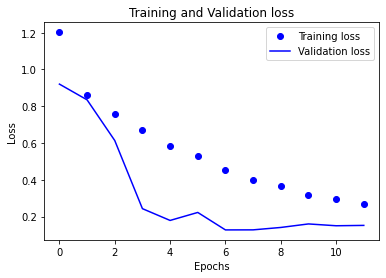

7/7 [==============================] - 1s 8ms/step


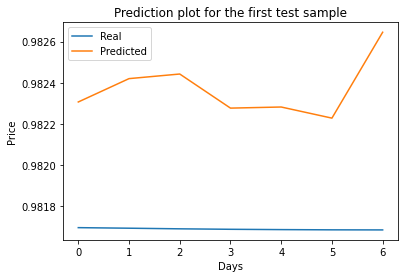

Day 1: 3.380070091356287e-07
Day 2: 3.872687860085924e-07
Day 3: 4.25019438597269e-07
Day 4: 3.8636253398638284e-07
Day 5: 4.662440493371754e-07
Day 6: 4.805532105238166e-07
Day 7: 6.709624668418094e-07
Overall Mean Squared Error: 4.506310706329535e-07


In [265]:
# Apply early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot the training and validation loss curves
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions using the trained model on the test data
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)

# Calculate the mean squared error for each day
mse_by_day = mean_squared_error(real_prices, predicted_prices, multioutput='raw_values')

# Create a DataFrame with the real and predicted prices for the first test sample
forex = pd.DataFrame({
    "Real": real_prices[0],
    "Predicted": predicted_prices[0]
})

# Plot the real and predicted prices for the first test sample
plot = forex.plot.line()
plot.set_title(f'Prediction plot for the first test sample')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Print the mean squared error for each day
for i, mse in enumerate(mse_by_day):
    print(f"Day {i + 1}: {mse}")

# Calculate and print the overall mean squared error
overall_mse = mean_squared_error(real_prices, predicted_prices)
print(f"Overall Mean Squared Error: {overall_mse}")

1/1 [==============================] - 0s 19ms/step


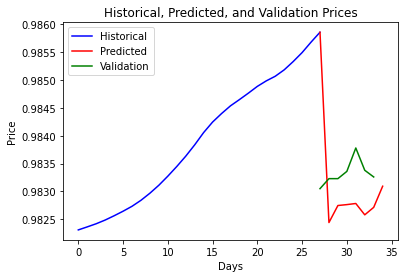

In [266]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

EURCHF_M5_202304141535_202304242355 = validation_dataframes_M5['EURCHF_M5_202304141535_202304242355']
EURCHF_M5_202304141535_202304242355 = EURCHF_M5_202304141535_202304242355.head(7)

# Make predictions using the trained model on the last window of historical data
last_window = X[-1].reshape(1, window_size, len(feature_columns))
predicted_future = model.predict(last_window)
predicted_future_prices = scaler.inverse_transform(predicted_future)

# Create a DataFrame with the historical data
historical_data = data.iloc[:, target_column].values[-window_size:]
historical_df = pd.DataFrame({
    "Price": historical_data,
    "Type": "Historical"
})

# Create a DataFrame with the predicted future data
predicted_data = np.concatenate((historical_data[-1:], predicted_future_prices.ravel()))
predicted_df = pd.DataFrame({
    "Price": predicted_data,
    "Type": "Predicted"
}, index=range(len(historical_data) - 1, len(historical_data) + future_days))

# Extract validation data from the provided variable
validation_data = EURCHF_M5_202304141535_202304242355.iloc[:, target_column].values

# Create a DataFrame with the validation data
validation_df = pd.DataFrame({
    "Price": validation_data,
    "Type": "Validation"
}, index=range(len(historical_data) - 1, len(historical_data) - 1 + len(validation_data)))

# Concatenate historical, predicted, and validation DataFrames
historical_predicted_validation = pd.concat([historical_df, predicted_df, validation_df], axis=0)

# Plot the historical, predicted, and validation data
ax = historical_predicted_validation[historical_predicted_validation['Type'] == 'Historical']['Price'].plot(color='blue', label='Historical')
historical_predicted_validation[historical_predicted_validation['Type'] == 'Predicted']['Price'].plot(color='red', label='Predicted', ax=ax)
historical_predicted_validation[historical_predicted_validation['Type'] == 'Validation']['Price'].plot(color='green', label='Validation', ax=ax)
plt.title('Historical, Predicted, and Validation Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [267]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming real_prices and predicted_prices have the correct values
mae = mean_absolute_error(real_prices, predicted_prices)
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"R-squared: {r2}")

# Extract the predicted and validation prices for each day
predicted_daily_prices = predicted_future_prices[:future_days].reshape(-1, 1)
validation_daily_prices = validation_data[:future_days].reshape(-1, 1)

# Calculate the metrics for each day
for i in range(len(predicted_daily_prices)):
    mae = mean_absolute_error(validation_daily_prices[i], predicted_daily_prices[i])
    mse = mean_squared_error(validation_daily_prices[i], predicted_daily_prices[i])
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(validation_daily_prices[i], predicted_daily_prices[i])

    print(f"Day {i + 1}:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape}") 
    # print(f"  Accuracy: {accuracy}%")

Mean Absolute Error: 0.0004696836267451105
Mean Squared Error: 4.506310706329535e-07
Root Mean Squared Error: 0.0006712906007333586
Mean Absolute Percentage Error: 0.047796010322176126
R-squared: 0.05548592081275978
Day 1:
  Mean Absolute Error (MAE): 0.0006077402114867958
  Mean Squared Error (MSE): 3.693481646580153e-07
  Root Mean Squared Error (RMSE): 0.0006077402114867958
  Mean Absolute Percentage Error (MAPE): 0.06182190239426233
Day 2:
  Mean Absolute Error (MAE): 0.00048220680236821245
  Mean Squared Error (MSE): 2.325234002501763e-07
  Root Mean Squared Error (RMSE): 0.00048220680236821245
  Mean Absolute Percentage Error (MAPE): 0.049043133587076515
Day 3:
  Mean Absolute Error (MAE): 0.0004659347343445308
  Mean Squared Error (MSE): 2.170951766687085e-07
  Root Mean Squared Error (RMSE): 0.0004659347343445308
  Mean Absolute Percentage Error (MAPE): 0.04738817309729471
Day 4:
  Mean Absolute Error (MAE): 0.0005758479690551876
  Mean Squared Error (MSE): 3.3160088346498435e-

**EURGBP_M5**

In [268]:
# data = ta_data_EURGBP
# Uncomment for Prediction using Denoised OHLC + TA values 
data = ta_denoised_data_EURGBP

# Window size for tuning
window_size = 28
# Number of future days to predict
future_days = 7

# Set up window for rolling data
def window_data(data, window, feature_col_numbers, target_col_number):
    X = []
    y = []
    for i in range(len(data) - window - future_days):
        features = data.iloc[i:(i + window), feature_col_numbers]
        target = data.iloc[(i + window):(i + window + future_days), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, future_days)

# Features with high correlation for pure data
# feature_columns = [1,2,3,4,9,28,29,30,33,37,38,39]

# Features with high correlation for Wavelet Denoised data
feature_columns = [0,1,2,3,8,27,28,29,32,36,37,38]

# target_column = 4 # Close value

target_column = 3 # Close value for Denoised Data

# Prepare the input and output arrays for the LSTM model
X, y = window_data(data, window_size, feature_columns, target_column)

# Scale the data using StandardScaler (Z-score normalization)
scaler = StandardScaler()
X = X.reshape(X.shape[0], -1)
X = scaler.fit_transform(X)
X = X.reshape(X.shape[0], window_size, len(feature_columns))

# # Scale the data using MinMaxScaler
# scaler = MinMaxScaler()
# X = X.reshape(X.shape[0], -1)
# X = scaler.fit_transform(X)
# X = X.reshape(X.shape[0], window_size, len(feature_columns))

scaler.fit(y)
y = scaler.transform(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

def impute_missing_values(X):
    for i in range(X.shape[2]):
        feature_values = X[:, :, i].flatten()
        feature_mean = np.nanmean(feature_values)
        feature_isnan = np.isnan(X[:, :, i])
        X[:, :, i][feature_isnan] = feature_mean
    return X

X_train = impute_missing_values(X_train)
X_test = impute_missing_values(X_test)

print(np.isnan(X_train).any())

print(f"Target variable: {data.columns[target_column]}")
print("Selected features:")
for col in feature_columns:
    print(data.columns[col])

False
Target variable: close_wave
Selected features:
open_wave
high_wave
low_wave
close_wave
KAMA
bb_bbm
bb_bbh
bb_bbl
EMA
SMA13
SMA21
SMA34


Epoch 1/50
49/49 [==============================] - 1s 20ms/step - loss: 0.6967 - val_loss: 0.4421
Epoch 2/50
49/49 [==============================] - 1s 19ms/step - loss: 0.4352 - val_loss: 0.2681
Epoch 3/50
49/49 [==============================] - 1s 19ms/step - loss: 0.3317 - val_loss: 0.2859
Epoch 4/50
49/49 [==============================] - 1s 19ms/step - loss: 0.2649 - val_loss: 0.3249
Epoch 5/50
49/49 [==============================] - 1s 19ms/step - loss: 0.2266 - val_loss: 0.3228
Epoch 6/50
49/49 [==============================] - 1s 19ms/step - loss: 0.2044 - val_loss: 0.3043
Epoch 7/50
49/49 [==============================] - 1s 19ms/step - loss: 0.1855 - val_loss: 0.3362


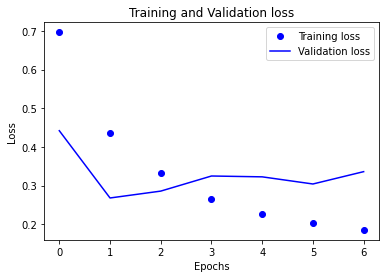

7/7 [==============================] - 0s 11ms/step


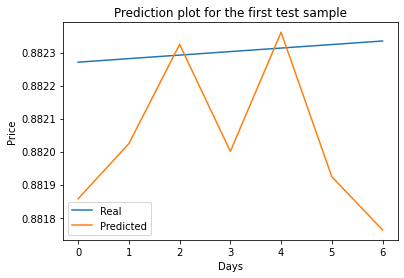

Day 1: 1.2003324743710062e-06
Day 2: 8.136996250832454e-07
Day 3: 4.6994797767804004e-07
Day 4: 8.680246108203017e-07
Day 5: 5.625510785628043e-07
Day 6: 1.0168109671519287e-06
Day 7: 1.526019122790479e-06
Overall Mean Squared Error: 9.224836937796864e-07


In [269]:
# Apply early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot the training and validation loss curves
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions using the trained model on the test data
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)

# Calculate the mean squared error for each day
mse_by_day = mean_squared_error(real_prices, predicted_prices, multioutput='raw_values')

# Create a DataFrame with the real and predicted prices for the first test sample
forex = pd.DataFrame({
    "Real": real_prices[0],
    "Predicted": predicted_prices[0]
})

# Plot the real and predicted prices for the first test sample
plot = forex.plot.line()
plot.set_title(f'Prediction plot for the first test sample')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Print the mean squared error for each day
for i, mse in enumerate(mse_by_day):
    print(f"Day {i + 1}: {mse}")

# Calculate and print the overall mean squared error
overall_mse = mean_squared_error(real_prices, predicted_prices)
print(f"Overall Mean Squared Error: {overall_mse}")

1/1 [==============================] - 0s 21ms/step


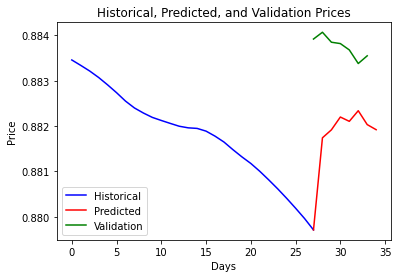

In [270]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

EURGBP_M5_202304141535_202304242355 = validation_dataframes_M5['EURGBP_M5_202304141535_202304242355']
EURGBP_M5_202304141535_202304242355 = EURGBP_M5_202304141535_202304242355.head(7)

# Make predictions using the trained model on the last window of historical data
last_window = X[-1].reshape(1, window_size, len(feature_columns))
predicted_future = model.predict(last_window)
predicted_future_prices = scaler.inverse_transform(predicted_future)

# Create a DataFrame with the historical data
historical_data = data.iloc[:, target_column].values[-window_size:]
historical_df = pd.DataFrame({
    "Price": historical_data,
    "Type": "Historical"
})

# Create a DataFrame with the predicted future data
predicted_data = np.concatenate((historical_data[-1:], predicted_future_prices.ravel()))
predicted_df = pd.DataFrame({
    "Price": predicted_data,
    "Type": "Predicted"
}, index=range(len(historical_data) - 1, len(historical_data) + future_days))

# Extract validation data from the provided variable
validation_data = EURGBP_M5_202304141535_202304242355.iloc[:, target_column].values

# Create a DataFrame with the validation data
validation_df = pd.DataFrame({
    "Price": validation_data,
    "Type": "Validation"
}, index=range(len(historical_data) - 1, len(historical_data) - 1 + len(validation_data)))

# Concatenate historical, predicted, and validation DataFrames
historical_predicted_validation = pd.concat([historical_df, predicted_df, validation_df], axis=0)

# Plot the historical, predicted, and validation data
ax = historical_predicted_validation[historical_predicted_validation['Type'] == 'Historical']['Price'].plot(color='blue', label='Historical')
historical_predicted_validation[historical_predicted_validation['Type'] == 'Predicted']['Price'].plot(color='red', label='Predicted', ax=ax)
historical_predicted_validation[historical_predicted_validation['Type'] == 'Validation']['Price'].plot(color='green', label='Validation', ax=ax)
plt.title('Historical, Predicted, and Validation Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [271]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming real_prices and predicted_prices have the correct values
mae = mean_absolute_error(real_prices, predicted_prices)
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"R-squared: {r2}")

# Extract the predicted and validation prices for each day
predicted_daily_prices = predicted_future_prices[:future_days].reshape(-1, 1)
validation_daily_prices = validation_data[:future_days].reshape(-1, 1)

# Calculate the metrics for each day
for i in range(len(predicted_daily_prices)):
    mae = mean_absolute_error(validation_daily_prices[i], predicted_daily_prices[i])
    mse = mean_squared_error(validation_daily_prices[i], predicted_daily_prices[i])
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(validation_daily_prices[i], predicted_daily_prices[i])

    print(f"Day {i + 1}:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape}") 
    # print(f"  Accuracy: {accuracy}%")

Mean Absolute Error: 0.0008334801494868043
Mean Squared Error: 9.224836937796864e-07
Root Mean Squared Error: 0.0009604601468981868
Mean Absolute Percentage Error: 0.09437273553218013
R-squared: -1.303802233128361
Day 1:
  Mean Absolute Error (MAE): 0.002178655071258584
  Mean Squared Error (MSE): 4.746537919520745e-06
  Root Mean Squared Error (RMSE): 0.002178655071258584
  Mean Absolute Percentage Error (MAPE): 0.24647649914682143
Day 2:
  Mean Absolute Error (MAE): 0.0021530597877502666
  Mean Squared Error (MSE): 4.635666449627223e-06
  Root Mean Squared Error (RMSE): 0.0021530597877502666
  Mean Absolute Percentage Error (MAPE): 0.24353951471605945
Day 3:
  Mean Absolute Error (MAE): 0.0016501165390014894
  Mean Squared Error (MSE): 2.7228845922862537e-06
  Root Mean Squared Error (RMSE): 0.0016501165390014894
  Mean Absolute Percentage Error (MAPE): 0.18669644611659097
Day 4:
  Mean Absolute Error (MAE): 0.0017153051567078137
  Mean Squared Error (MSE): 2.9422717806284174e-06
  R

**EURJPY_M5**

In [272]:
# data = ta_data_EURJPY
# Uncomment for Prediction using Denoised OHLC + TA values 
data = ta_denoised_data_EURJPY

# Window size for tuning
window_size = 28
# Number of future days to predict
future_days = 7

# Set up window for rolling data
def window_data(data, window, feature_col_numbers, target_col_number):
    X = []
    y = []
    for i in range(len(data) - window - future_days):
        features = data.iloc[i:(i + window), feature_col_numbers]
        target = data.iloc[(i + window):(i + window + future_days), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, future_days)

# Features with high correlation for pure data
# feature_columns = [1,2,3,4,9,28,29,30,33,37,38,39]

# Features with high correlation for Wavelet Denoised data
feature_columns = [0,1,2,3,8,27,28,29,32,36,37,38]

# target_column = 4 # Close value

target_column = 3 # Close value for Denoised Data

# Prepare the input and output arrays for the LSTM model
X, y = window_data(data, window_size, feature_columns, target_column)

# Scale the data using StandardScaler (Z-score normalization)
scaler = StandardScaler()
X = X.reshape(X.shape[0], -1)
X = scaler.fit_transform(X)
X = X.reshape(X.shape[0], window_size, len(feature_columns))

# # Scale the data using MinMaxScaler
# scaler = MinMaxScaler()
# X = X.reshape(X.shape[0], -1)
# X = scaler.fit_transform(X)
# X = X.reshape(X.shape[0], window_size, len(feature_columns))

scaler.fit(y)
y = scaler.transform(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

def impute_missing_values(X):
    for i in range(X.shape[2]):
        feature_values = X[:, :, i].flatten()
        feature_mean = np.nanmean(feature_values)
        feature_isnan = np.isnan(X[:, :, i])
        X[:, :, i][feature_isnan] = feature_mean
    return X

X_train = impute_missing_values(X_train)
X_test = impute_missing_values(X_test)

print(np.isnan(X_train).any())

print(f"Target variable: {data.columns[target_column]}")
print("Selected features:")
for col in feature_columns:
    print(data.columns[col])

False
Target variable: close_wave
Selected features:
open_wave
high_wave
low_wave
close_wave
KAMA
bb_bbm
bb_bbh
bb_bbl
EMA
SMA13
SMA21
SMA34


Epoch 1/50
49/49 [==============================] - 1s 22ms/step - loss: 0.3552 - val_loss: 0.1105
Epoch 2/50
49/49 [==============================] - 1s 22ms/step - loss: 0.2731 - val_loss: 0.1027
Epoch 3/50
49/49 [==============================] - 1s 18ms/step - loss: 0.2514 - val_loss: 0.1133
Epoch 4/50
49/49 [==============================] - 1s 28ms/step - loss: 0.2379 - val_loss: 0.1250
Epoch 5/50
49/49 [==============================] - 1s 19ms/step - loss: 0.1868 - val_loss: 0.1055
Epoch 6/50
49/49 [==============================] - 1s 19ms/step - loss: 0.1729 - val_loss: 0.1158
Epoch 7/50
49/49 [==============================] - 1s 19ms/step - loss: 0.1947 - val_loss: 0.1397


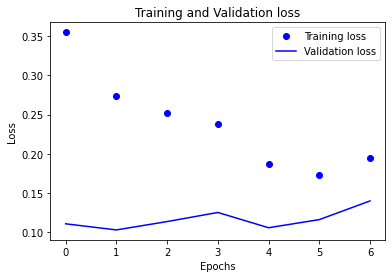

7/7 [==============================] - 0s 7ms/step


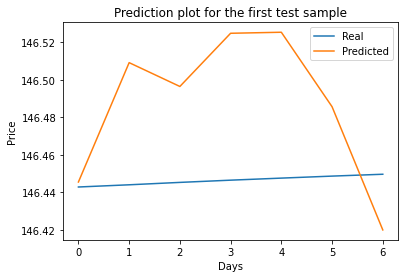

Day 1: 0.011017430626246627
Day 2: 0.01063086201399852
Day 3: 0.0123719235043443
Day 4: 0.02134818001163349
Day 5: 0.021774344600384674
Day 6: 0.02316010224898937
Day 7: 0.02165564689891738
Overall Mean Squared Error: 0.017422641414930624


In [273]:
# Apply early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot the training and validation loss curves
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions using the trained model on the test data
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)

# Calculate the mean squared error for each day
mse_by_day = mean_squared_error(real_prices, predicted_prices, multioutput='raw_values')

# Create a DataFrame with the real and predicted prices for the first test sample
forex = pd.DataFrame({
    "Real": real_prices[0],
    "Predicted": predicted_prices[0]
})

# Plot the real and predicted prices for the first test sample
plot = forex.plot.line()
plot.set_title(f'Prediction plot for the first test sample')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Print the mean squared error for each day
for i, mse in enumerate(mse_by_day):
    print(f"Day {i + 1}: {mse}")

# Calculate and print the overall mean squared error
overall_mse = mean_squared_error(real_prices, predicted_prices)
print(f"Overall Mean Squared Error: {overall_mse}")

1/1 [==============================] - 0s 18ms/step


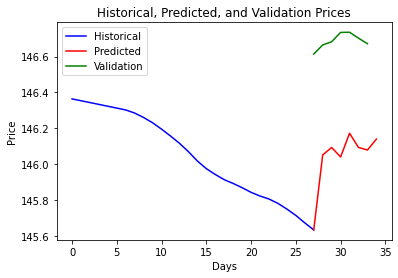

In [274]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

EURJPY_M5_202304141535_202304242355 = validation_dataframes_M5['EURJPY_M5_202304141535_202304242355']
EURJPY_M5_202304141535_202304242355 = EURJPY_M5_202304141535_202304242355.head(7)

# Make predictions using the trained model on the last window of historical data
last_window = X[-1].reshape(1, window_size, len(feature_columns))
predicted_future = model.predict(last_window)
predicted_future_prices = scaler.inverse_transform(predicted_future)

# Create a DataFrame with the historical data
historical_data = data.iloc[:, target_column].values[-window_size:]
historical_df = pd.DataFrame({
    "Price": historical_data,
    "Type": "Historical"
})

# Create a DataFrame with the predicted future data
predicted_data = np.concatenate((historical_data[-1:], predicted_future_prices.ravel()))
predicted_df = pd.DataFrame({
    "Price": predicted_data,
    "Type": "Predicted"
}, index=range(len(historical_data) - 1, len(historical_data) + future_days))

# Extract validation data from the provided variable
validation_data = EURJPY_M5_202304141535_202304242355.iloc[:, target_column].values

# Create a DataFrame with the validation data
validation_df = pd.DataFrame({
    "Price": validation_data,
    "Type": "Validation"
}, index=range(len(historical_data) - 1, len(historical_data) - 1 + len(validation_data)))

# Concatenate historical, predicted, and validation DataFrames
historical_predicted_validation = pd.concat([historical_df, predicted_df, validation_df], axis=0)

# Plot the historical, predicted, and validation data
ax = historical_predicted_validation[historical_predicted_validation['Type'] == 'Historical']['Price'].plot(color='blue', label='Historical')
historical_predicted_validation[historical_predicted_validation['Type'] == 'Predicted']['Price'].plot(color='red', label='Predicted', ax=ax)
historical_predicted_validation[historical_predicted_validation['Type'] == 'Validation']['Price'].plot(color='green', label='Validation', ax=ax)
plt.title('Historical, Predicted, and Validation Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [275]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming real_prices and predicted_prices have the correct values
mae = mean_absolute_error(real_prices, predicted_prices)
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"R-squared: {r2}")

# Extract the predicted and validation prices for each day
predicted_daily_prices = predicted_future_prices[:future_days].reshape(-1, 1)
validation_daily_prices = validation_data[:future_days].reshape(-1, 1)

# Calculate the metrics for each day
for i in range(len(predicted_daily_prices)):
    mae = mean_absolute_error(validation_daily_prices[i], predicted_daily_prices[i])
    mse = mean_squared_error(validation_daily_prices[i], predicted_daily_prices[i])
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(validation_daily_prices[i], predicted_daily_prices[i])

    print(f"Day {i + 1}:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape}") 
    # print(f"  Accuracy: {accuracy}%")

Mean Absolute Error: 0.09137416344111074
Mean Squared Error: 0.017422641414930624
Root Mean Squared Error: 0.13199485374411618
Mean Absolute Percentage Error: 0.06242610134852953
R-squared: 0.543679549245856
Day 1:
  Mean Absolute Error (MAE): 0.5631424560546918
  Mean Squared Error (MSE): 0.3171294258113105
  Root Mean Squared Error (RMSE): 0.5631424560546918
  Mean Absolute Percentage Error (MAPE): 0.3840986918402689
Day 2:
  Mean Absolute Error (MAE): 0.572531738281242
  Mean Squared Error (MSE): 0.32779259133934063
  Root Mean Squared Error (RMSE): 0.572531738281242
  Mean Absolute Percentage Error (MAPE): 0.39036698481658344
Day 3:
  Mean Absolute Error (MAE): 0.6436628417968677
  Mean Squared Error (MSE): 0.41430185391001956
  Root Mean Squared Error (RMSE): 0.6436628417968677
  Mean Absolute Percentage Error (MAPE): 0.4388121607799594
Day 4:
  Mean Absolute Error (MAE): 0.5631402587890761
  Mean Squared Error (MSE): 0.31712695106902766
  Root Mean Squared Error (RMSE): 0.5631402

**EURUSD_M5**

In [276]:
# data = ta_data_EURUSD
# Uncomment for Prediction using Denoised OHLC + TA values 
data = ta_denoised_data_EURUSD

# Window size for tuning
window_size = 28
# Number of future days to predict
future_days = 7

# Set up window for rolling data
def window_data(data, window, feature_col_numbers, target_col_number):
    X = []
    y = []
    for i in range(len(data) - window - future_days):
        features = data.iloc[i:(i + window), feature_col_numbers]
        target = data.iloc[(i + window):(i + window + future_days), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, future_days)

# Features with high correlation for pure data
# feature_columns = [1,2,3,4,9,28,29,30,33,37,38,39]

# Features with high correlation for Wavelet Denoised data
feature_columns = [0,1,2,3,8,27,28,29,32,36,37,38]

# target_column = 4 # Close value

target_column = 3 # Close value for Denoised Data

# Prepare the input and output arrays for the LSTM model
X, y = window_data(data, window_size, feature_columns, target_column)

# Scale the data using StandardScaler (Z-score normalization)
scaler = StandardScaler()
X = X.reshape(X.shape[0], -1)
X = scaler.fit_transform(X)
X = X.reshape(X.shape[0], window_size, len(feature_columns))

# # Scale the data using MinMaxScaler
# scaler = MinMaxScaler()
# X = X.reshape(X.shape[0], -1)
# X = scaler.fit_transform(X)
# X = X.reshape(X.shape[0], window_size, len(feature_columns))

scaler.fit(y)
y = scaler.transform(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

def impute_missing_values(X):
    for i in range(X.shape[2]):
        feature_values = X[:, :, i].flatten()
        feature_mean = np.nanmean(feature_values)
        feature_isnan = np.isnan(X[:, :, i])
        X[:, :, i][feature_isnan] = feature_mean
    return X

X_train = impute_missing_values(X_train)
X_test = impute_missing_values(X_test)

print(np.isnan(X_train).any())

print(f"Target variable: {data.columns[target_column]}")
print("Selected features:")
for col in feature_columns:
    print(data.columns[col])

False
Target variable: close_wave
Selected features:
open_wave
high_wave
low_wave
close_wave
KAMA
bb_bbm
bb_bbh
bb_bbl
EMA
SMA13
SMA21
SMA34


Epoch 1/50
49/49 [==============================] - 1s 20ms/step - loss: 0.2619 - val_loss: 0.1863
Epoch 2/50
49/49 [==============================] - 1s 19ms/step - loss: 0.1994 - val_loss: 0.1571
Epoch 3/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1938 - val_loss: 0.1490
Epoch 4/50
49/49 [==============================] - 1s 19ms/step - loss: 0.1696 - val_loss: 0.1614
Epoch 5/50
49/49 [==============================] - 1s 19ms/step - loss: 0.1666 - val_loss: 0.1568
Epoch 6/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1418 - val_loss: 0.1770
Epoch 7/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1117 - val_loss: 0.1800
Epoch 8/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1132 - val_loss: 0.1876


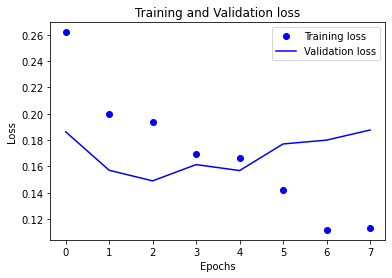

7/7 [==============================] - 0s 7ms/step


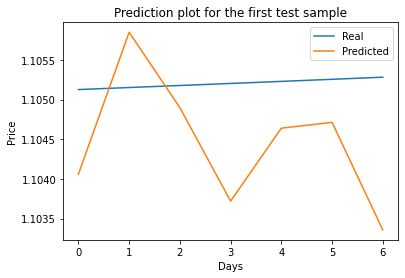

Day 1: 5.819453642019692e-06
Day 2: 3.056403930711617e-06
Day 3: 3.1089650026822127e-06
Day 4: 7.870263663598523e-06
Day 5: 4.227983866003507e-06
Day 6: 4.352197312776488e-06
Day 7: 9.026285657195807e-06
Overall Mean Squared Error: 5.351650439283978e-06


In [277]:
# Apply early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot the training and validation loss curves
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions using the trained model on the test data
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)

# Calculate the mean squared error for each day
mse_by_day = mean_squared_error(real_prices, predicted_prices, multioutput='raw_values')

# Create a DataFrame with the real and predicted prices for the first test sample
forex = pd.DataFrame({
    "Real": real_prices[0],
    "Predicted": predicted_prices[0]
})

# Plot the real and predicted prices for the first test sample
plot = forex.plot.line()
plot.set_title(f'Prediction plot for the first test sample')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Print the mean squared error for each day
for i, mse in enumerate(mse_by_day):
    print(f"Day {i + 1}: {mse}")

# Calculate and print the overall mean squared error
overall_mse = mean_squared_error(real_prices, predicted_prices)
print(f"Overall Mean Squared Error: {overall_mse}")

1/1 [==============================] - 0s 18ms/step


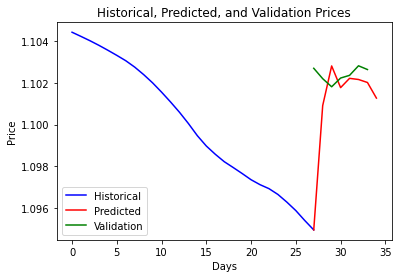

In [278]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

EURUSD_M5_202304141535_202304242355 = validation_dataframes_M5['EURUSD_M5_202304141535_202304242355']
EURUSD_M5_202304141535_202304242355 = EURUSD_M5_202304141535_202304242355.head(7)

# Make predictions using the trained model on the last window of historical data
last_window = X[-1].reshape(1, window_size, len(feature_columns))
predicted_future = model.predict(last_window)
predicted_future_prices = scaler.inverse_transform(predicted_future)

# Create a DataFrame with the historical data
historical_data = data.iloc[:, target_column].values[-window_size:]
historical_df = pd.DataFrame({
    "Price": historical_data,
    "Type": "Historical"
})

# Create a DataFrame with the predicted future data
predicted_data = np.concatenate((historical_data[-1:], predicted_future_prices.ravel()))
predicted_df = pd.DataFrame({
    "Price": predicted_data,
    "Type": "Predicted"
}, index=range(len(historical_data) - 1, len(historical_data) + future_days))

# Extract validation data from the provided variable
validation_data = EURUSD_M5_202304141535_202304242355.iloc[:, target_column].values

# Create a DataFrame with the validation data
validation_df = pd.DataFrame({
    "Price": validation_data,
    "Type": "Validation"
}, index=range(len(historical_data) - 1, len(historical_data) - 1 + len(validation_data)))

# Concatenate historical, predicted, and validation DataFrames
historical_predicted_validation = pd.concat([historical_df, predicted_df, validation_df], axis=0)

# Plot the historical, predicted, and validation data
ax = historical_predicted_validation[historical_predicted_validation['Type'] == 'Historical']['Price'].plot(color='blue', label='Historical')
historical_predicted_validation[historical_predicted_validation['Type'] == 'Predicted']['Price'].plot(color='red', label='Predicted', ax=ax)
historical_predicted_validation[historical_predicted_validation['Type'] == 'Validation']['Price'].plot(color='green', label='Validation', ax=ax)
plt.title('Historical, Predicted, and Validation Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [279]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming real_prices and predicted_prices have the correct values
mae = mean_absolute_error(real_prices, predicted_prices)
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"R-squared: {r2}")

# Extract the predicted and validation prices for each day
predicted_daily_prices = predicted_future_prices[:future_days].reshape(-1, 1)
validation_daily_prices = validation_data[:future_days].reshape(-1, 1)

# Calculate the metrics for each day
for i in range(len(predicted_daily_prices)):
    mae = mean_absolute_error(validation_daily_prices[i], predicted_daily_prices[i])
    mse = mean_squared_error(validation_daily_prices[i], predicted_daily_prices[i])
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(validation_daily_prices[i], predicted_daily_prices[i])

    print(f"Day {i + 1}:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape}") 
    # print(f"  Accuracy: {accuracy}%")

Mean Absolute Error: 0.0019317592900393182
Mean Squared Error: 5.351650439283978e-06
Root Mean Squared Error: 0.002313363447295729
Mean Absolute Percentage Error: 0.17476376679251063
R-squared: 0.06592020987757954
Day 1:
  Mean Absolute Error (MAE): 0.0017956409072876767
  Mean Squared Error (MSE): 3.2243262679249107e-06
  Root Mean Squared Error (RMSE): 0.0017956409072876767
  Mean Absolute Percentage Error (MAPE): 0.1628389066289121
Day 2:
  Mean Absolute Error (MAE): 0.0006128998184204981
  Mean Squared Error (MSE): 3.7564618741987957e-07
  Root Mean Squared Error (RMSE): 0.0006128998184204981
  Mean Absolute Percentage Error (MAPE): 0.055606446903992725
Day 3:
  Mean Absolute Error (MAE): 4.125434875490441e-05
  Mean Squared Error (MSE): 1.7019212911912832e-09
  Root Mean Squared Error (RMSE): 4.125434875490441e-05
  Mean Absolute Percentage Error (MAPE): 0.0037442003916160907
Day 4:
  Mean Absolute Error (MAE): 1.4457931518663258e-05
  Mean Squared Error (MSE): 2.0903178379835647e

**GBPCHF_M5**

In [280]:
# data = ta_data_GBPCHF
# Uncomment for Prediction using Denoised OHLC + TA values 
data = ta_denoised_data_GBPCHF

# Window size for tuning
window_size = 28
# Number of future days to predict
future_days = 7

# Set up window for rolling data
def window_data(data, window, feature_col_numbers, target_col_number):
    X = []
    y = []
    for i in range(len(data) - window - future_days):
        features = data.iloc[i:(i + window), feature_col_numbers]
        target = data.iloc[(i + window):(i + window + future_days), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, future_days)

# Features with high correlation for pure data
# feature_columns = [1,2,3,4,9,28,29,30,33,37,38,39]

# Features with high correlation for Wavelet Denoised data
feature_columns = [0,1,2,3,8,27,28,29,32,36,37,38]

# target_column = 4 # Close value

target_column = 3 # Close value for Denoised Data

# Prepare the input and output arrays for the LSTM model
X, y = window_data(data, window_size, feature_columns, target_column)

# Scale the data using StandardScaler (Z-score normalization)
scaler = StandardScaler()
X = X.reshape(X.shape[0], -1)
X = scaler.fit_transform(X)
X = X.reshape(X.shape[0], window_size, len(feature_columns))

# # Scale the data using MinMaxScaler
# scaler = MinMaxScaler()
# X = X.reshape(X.shape[0], -1)
# X = scaler.fit_transform(X)
# X = X.reshape(X.shape[0], window_size, len(feature_columns))

scaler.fit(y)
y = scaler.transform(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

def impute_missing_values(X):
    for i in range(X.shape[2]):
        feature_values = X[:, :, i].flatten()
        feature_mean = np.nanmean(feature_values)
        feature_isnan = np.isnan(X[:, :, i])
        X[:, :, i][feature_isnan] = feature_mean
    return X

X_train = impute_missing_values(X_train)
X_test = impute_missing_values(X_test)

print(np.isnan(X_train).any())

print(f"Target variable: {data.columns[target_column]}")
print("Selected features:")
for col in feature_columns:
    print(data.columns[col])

False
Target variable: close_wave
Selected features:
open_wave
high_wave
low_wave
close_wave
KAMA
bb_bbm
bb_bbh
bb_bbl
EMA
SMA13
SMA21
SMA34


Epoch 1/50
49/49 [==============================] - 1s 21ms/step - loss: 0.4569 - val_loss: 0.1048
Epoch 2/50
49/49 [==============================] - 1s 20ms/step - loss: 0.2591 - val_loss: 0.1183
Epoch 3/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1733 - val_loss: 0.1155
Epoch 4/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1563 - val_loss: 0.1053
Epoch 5/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1083 - val_loss: 0.1077
Epoch 6/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1072 - val_loss: 0.1081


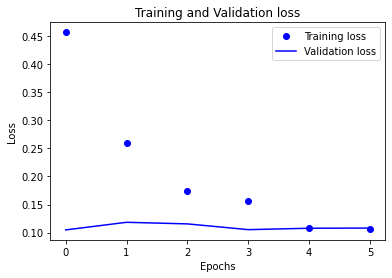

7/7 [==============================] - 0s 7ms/step


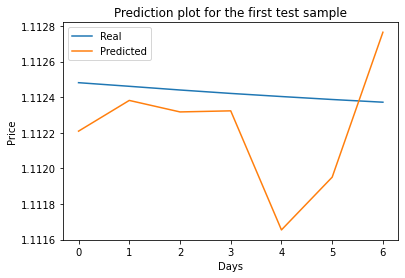

Day 1: 1.1161827821656314e-06
Day 2: 1.277557093121095e-06
Day 3: 1.5391544813133685e-06
Day 4: 1.776514550091293e-06
Day 5: 2.7762297091668577e-06
Day 6: 2.6324303970389792e-06
Day 7: 2.793904945387603e-06
Overall Mean Squared Error: 1.987424851183547e-06


In [281]:
# Apply early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot the training and validation loss curves
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions using the trained model on the test data
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)

# Calculate the mean squared error for each day
mse_by_day = mean_squared_error(real_prices, predicted_prices, multioutput='raw_values')

# Create a DataFrame with the real and predicted prices for the first test sample
forex = pd.DataFrame({
    "Real": real_prices[0],
    "Predicted": predicted_prices[0]
})

# Plot the real and predicted prices for the first test sample
plot = forex.plot.line()
plot.set_title(f'Prediction plot for the first test sample')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Print the mean squared error for each day
for i, mse in enumerate(mse_by_day):
    print(f"Day {i + 1}: {mse}")

# Calculate and print the overall mean squared error
overall_mse = mean_squared_error(real_prices, predicted_prices)
print(f"Overall Mean Squared Error: {overall_mse}")

1/1 [==============================] - 0s 20ms/step


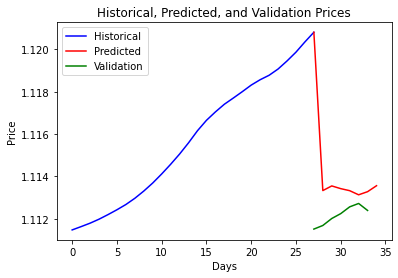

In [282]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

GBPCHF_M5_202304141535_202304242355 = validation_dataframes_M5['GBPCHF_M5_202304141535_202304242355']
GBPCHF_M5_202304141535_202304242355 = GBPCHF_M5_202304141535_202304242355.head(7)

# Make predictions using the trained model on the last window of historical data
last_window = X[-1].reshape(1, window_size, len(feature_columns))
predicted_future = model.predict(last_window)
predicted_future_prices = scaler.inverse_transform(predicted_future)

# Create a DataFrame with the historical data
historical_data = data.iloc[:, target_column].values[-window_size:]
historical_df = pd.DataFrame({
    "Price": historical_data,
    "Type": "Historical"
})

# Create a DataFrame with the predicted future data
predicted_data = np.concatenate((historical_data[-1:], predicted_future_prices.ravel()))
predicted_df = pd.DataFrame({
    "Price": predicted_data,
    "Type": "Predicted"
}, index=range(len(historical_data) - 1, len(historical_data) + future_days))

# Extract validation data from the provided variable
validation_data = GBPCHF_M5_202304141535_202304242355.iloc[:, target_column].values

# Create a DataFrame with the validation data
validation_df = pd.DataFrame({
    "Price": validation_data,
    "Type": "Validation"
}, index=range(len(historical_data) - 1, len(historical_data) - 1 + len(validation_data)))

# Concatenate historical, predicted, and validation DataFrames
historical_predicted_validation = pd.concat([historical_df, predicted_df, validation_df], axis=0)

# Plot the historical, predicted, and validation data
ax = historical_predicted_validation[historical_predicted_validation['Type'] == 'Historical']['Price'].plot(color='blue', label='Historical')
historical_predicted_validation[historical_predicted_validation['Type'] == 'Predicted']['Price'].plot(color='red', label='Predicted', ax=ax)
historical_predicted_validation[historical_predicted_validation['Type'] == 'Validation']['Price'].plot(color='green', label='Validation', ax=ax)
plt.title('Historical, Predicted, and Validation Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [283]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming real_prices and predicted_prices have the correct values
mae = mean_absolute_error(real_prices, predicted_prices)
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"R-squared: {r2}")

# Extract the predicted and validation prices for each day
predicted_daily_prices = predicted_future_prices[:future_days].reshape(-1, 1)
validation_daily_prices = validation_data[:future_days].reshape(-1, 1)

# Calculate the metrics for each day
for i in range(len(predicted_daily_prices)):
    mae = mean_absolute_error(validation_daily_prices[i], predicted_daily_prices[i])
    mse = mean_squared_error(validation_daily_prices[i], predicted_daily_prices[i])
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(validation_daily_prices[i], predicted_daily_prices[i])

    print(f"Day {i + 1}:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape}") 
    # print(f"  Accuracy: {accuracy}%")

Mean Absolute Error: 0.0007384526010389719
Mean Squared Error: 1.987424851183547e-06
Root Mean Squared Error: 0.001409760565196639
Mean Absolute Percentage Error: 0.06626980451066214
R-squared: 0.085772195301465
Day 1:
  Mean Absolute Error (MAE): 0.0018185760879516621
  Mean Squared Error (MSE): 3.3072189876695717e-06
  Root Mean Squared Error (RMSE): 0.0018185760879516621
  Mean Absolute Percentage Error (MAPE): 0.16361311080886923
Day 2:
  Mean Absolute Error (MAE): 0.0018687556457519516
  Mean Squared Error (MSE): 3.4922476635297937e-06
  Root Mean Squared Error (RMSE): 0.0018687556457519516
  Mean Absolute Percentage Error (MAPE): 0.16810193992443434
Day 3:
  Mean Absolute Error (MAE): 0.001410248031616268
  Mean Squared Error (MSE): 1.9887995106775582e-06
  Root Mean Squared Error (RMSE): 0.001410248031616268
  Mean Absolute Percentage Error (MAPE): 0.12681972568738303
Day 4:
  Mean Absolute Error (MAE): 0.001084046134948835
  Mean Squared Error (MSE): 1.1751560226975078e-06
  Ro

**GBPJPY_M5**

In [284]:
# data = ta_data_GBPJPY
# Uncomment for Prediction using Denoised OHLC + TA values 
data = ta_denoised_data_GBPJPY

# Window size for tuning
window_size = 28
# Number of future days to predict
future_days = 7

# Set up window for rolling data
def window_data(data, window, feature_col_numbers, target_col_number):
    X = []
    y = []
    for i in range(len(data) - window - future_days):
        features = data.iloc[i:(i + window), feature_col_numbers]
        target = data.iloc[(i + window):(i + window + future_days), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, future_days)

# Features with high correlation for pure data
# feature_columns = [1,2,3,4,9,28,29,30,33,37,38,39]

# Features with high correlation for Wavelet Denoised data
feature_columns = [0,1,2,3,8,27,28,29,32,36,37,38]

# target_column = 4 # Close value

target_column = 3 # Close value for Denoised Data

# Prepare the input and output arrays for the LSTM model
X, y = window_data(data, window_size, feature_columns, target_column)

# Scale the data using StandardScaler (Z-score normalization)
scaler = StandardScaler()
X = X.reshape(X.shape[0], -1)
X = scaler.fit_transform(X)
X = X.reshape(X.shape[0], window_size, len(feature_columns))

# # Scale the data using MinMaxScaler
# scaler = MinMaxScaler()
# X = X.reshape(X.shape[0], -1)
# X = scaler.fit_transform(X)
# X = X.reshape(X.shape[0], window_size, len(feature_columns))

scaler.fit(y)
y = scaler.transform(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

def impute_missing_values(X):
    for i in range(X.shape[2]):
        feature_values = X[:, :, i].flatten()
        feature_mean = np.nanmean(feature_values)
        feature_isnan = np.isnan(X[:, :, i])
        X[:, :, i][feature_isnan] = feature_mean
    return X

X_train = impute_missing_values(X_train)
X_test = impute_missing_values(X_test)

print(np.isnan(X_train).any())

print(f"Target variable: {data.columns[target_column]}")
print("Selected features:")
for col in feature_columns:
    print(data.columns[col])   

False
Target variable: close_wave
Selected features:
open_wave
high_wave
low_wave
close_wave
KAMA
bb_bbm
bb_bbh
bb_bbl
EMA
SMA13
SMA21
SMA34


Epoch 1/50
49/49 [==============================] - 1s 20ms/step - loss: 0.2995 - val_loss: 0.0537
Epoch 2/50
49/49 [==============================] - 1s 20ms/step - loss: 0.2140 - val_loss: 0.1294
Epoch 3/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1675 - val_loss: 0.0800
Epoch 4/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1564 - val_loss: 0.1121
Epoch 5/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1796 - val_loss: 0.0493
Epoch 6/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1440 - val_loss: 0.0350
Epoch 7/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1500 - val_loss: 0.0303
Epoch 8/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1103 - val_loss: 0.0263
Epoch 9/50
49/49 [==============================] - 1s 19ms/step - loss: 0.1187 - val_loss: 0.0904
Epoch 10/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0931 - val_loss: 0.0637
Epoch 11/

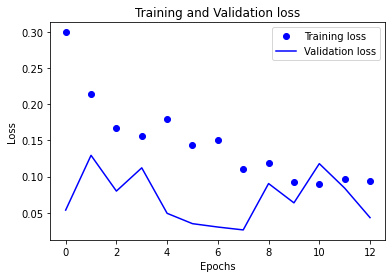

7/7 [==============================] - 0s 11ms/step


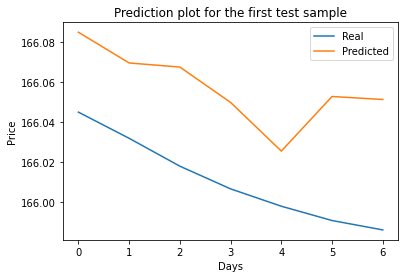

Day 1: 0.0009353731467346918
Day 2: 0.0009733613242627362
Day 3: 0.0015983865709767813
Day 4: 0.0016270176703899143
Day 5: 0.0013441673396554317
Day 6: 0.002031589460735285
Day 7: 0.0034200255614392243
Overall Mean Squared Error: 0.0017042744391705805


In [285]:
# Apply early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot the training and validation loss curves
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions using the trained model on the test data
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)

# Calculate the mean squared error for each day
mse_by_day = mean_squared_error(real_prices, predicted_prices, multioutput='raw_values')

# Create a DataFrame with the real and predicted prices for the first test sample
forex = pd.DataFrame({
    "Real": real_prices[0],
    "Predicted": predicted_prices[0]
})

# Plot the real and predicted prices for the first test sample
plot = forex.plot.line()
plot.set_title(f'Prediction plot for the first test sample')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Print the mean squared error for each day
for i, mse in enumerate(mse_by_day):
    print(f"Day {i + 1}: {mse}")

# Calculate and print the overall mean squared error
overall_mse = mean_squared_error(real_prices, predicted_prices)
print(f"Overall Mean Squared Error: {overall_mse}")

1/1 [==============================] - 0s 19ms/step


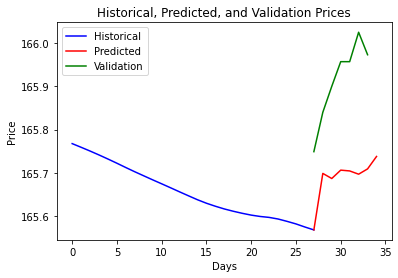

In [286]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

GBPJPY_M5_202304141535_202304242355 = validation_dataframes_M5['GBPJPY_M5_202304141535_202304242355']
GBPJPY_M5_202304141535_202304242355 = GBPJPY_M5_202304141535_202304242355.head(7)

# Make predictions using the trained model on the last window of historical data
last_window = X[-1].reshape(1, window_size, len(feature_columns))
predicted_future = model.predict(last_window)
predicted_future_prices = scaler.inverse_transform(predicted_future)

# Create a DataFrame with the historical data
historical_data = data.iloc[:, target_column].values[-window_size:]
historical_df = pd.DataFrame({
    "Price": historical_data,
    "Type": "Historical"
})

# Create a DataFrame with the predicted future data
predicted_data = np.concatenate((historical_data[-1:], predicted_future_prices.ravel()))
predicted_df = pd.DataFrame({
    "Price": predicted_data,
    "Type": "Predicted"
}, index=range(len(historical_data) - 1, len(historical_data) + future_days))

# Extract validation data from the provided variable
validation_data = GBPJPY_M5_202304141535_202304242355.iloc[:, target_column].values

# Create a DataFrame with the validation data
validation_df = pd.DataFrame({
    "Price": validation_data,
    "Type": "Validation"
}, index=range(len(historical_data) - 1, len(historical_data) - 1 + len(validation_data)))

# Concatenate historical, predicted, and validation DataFrames
historical_predicted_validation = pd.concat([historical_df, predicted_df, validation_df], axis=0)

# Plot the historical, predicted, and validation data
ax = historical_predicted_validation[historical_predicted_validation['Type'] == 'Historical']['Price'].plot(color='blue', label='Historical')
historical_predicted_validation[historical_predicted_validation['Type'] == 'Predicted']['Price'].plot(color='red', label='Predicted', ax=ax)
historical_predicted_validation[historical_predicted_validation['Type'] == 'Validation']['Price'].plot(color='green', label='Validation', ax=ax)
plt.title('Historical, Predicted, and Validation Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [287]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming real_prices and predicted_prices have the correct values
mae = mean_absolute_error(real_prices, predicted_prices)
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"R-squared: {r2}")

# Extract the predicted and validation prices for each day
predicted_daily_prices = predicted_future_prices[:future_days].reshape(-1, 1)
validation_daily_prices = validation_data[:future_days].reshape(-1, 1)

# Calculate the metrics for each day
for i in range(len(predicted_daily_prices)):
    mae = mean_absolute_error(validation_daily_prices[i], predicted_daily_prices[i])
    mse = mean_squared_error(validation_daily_prices[i], predicted_daily_prices[i])
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(validation_daily_prices[i], predicted_daily_prices[i])

    print(f"Day {i + 1}:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape}") 
    # print(f"  Accuracy: {accuracy}%")

Mean Absolute Error: 0.029389107535454033
Mean Squared Error: 0.0017042744391705805
Root Mean Squared Error: 0.04128285890258305
Mean Absolute Percentage Error: 0.01772266732160922
R-squared: 0.8531863941258709
Day 1:
  Mean Absolute Error (MAE): 0.050284790039057725
  Mean Squared Error (MSE): 0.002528560109272119
  Root Mean Squared Error (RMSE): 0.050284790039057725
  Mean Absolute Percentage Error (MAPE): 0.030337914581118272
Day 2:
  Mean Absolute Error (MAE): 0.1530493164062534
  Mean Squared Error (MSE): 0.02342409325242147
  Root Mean Squared Error (RMSE): 0.1530493164062534
  Mean Absolute Percentage Error (MAPE): 0.09228733502547842
Day 3:
  Mean Absolute Error (MAE): 0.19370117187500568
  Mean Squared Error (MSE): 0.037520143985750494
  Root Mean Squared Error (RMSE): 0.19370117187500568
  Mean Absolute Percentage Error (MAPE): 0.1167577889541927
Day 4:
  Mean Absolute Error (MAE): 0.25254748535155613
  Mean Squared Error (MSE): 0.06378023235739445
  Root Mean Squared Error 

**GBPUSD_M5**

In [288]:
# data = ta_data_GBPUSD
# Uncomment for Prediction using Denoised OHLC + TA values 
data = ta_denoised_data_GBPUSD

# Window size for tuning
window_size = 28
# Number of future days to predict
future_days = 7

# Set up window for rolling data
def window_data(data, window, feature_col_numbers, target_col_number):
    X = []
    y = []
    for i in range(len(data) - window - future_days):
        features = data.iloc[i:(i + window), feature_col_numbers]
        target = data.iloc[(i + window):(i + window + future_days), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, future_days)

# Features with high correlation for pure data
# feature_columns = [1,2,3,4,9,28,29,30,33,37,38,39]

# Features with high correlation for Wavelet Denoised data
feature_columns = [0,1,2,3,8,27,28,29,32,36,37,38]

# target_column = 4 # Close value

target_column = 3 # Close value for Denoised Data

# Prepare the input and output arrays for the LSTM model
X, y = window_data(data, window_size, feature_columns, target_column)

# Scale the data using StandardScaler (Z-score normalization)
scaler = StandardScaler()
X = X.reshape(X.shape[0], -1)
X = scaler.fit_transform(X)
X = X.reshape(X.shape[0], window_size, len(feature_columns))

# # Scale the data using MinMaxScaler
# scaler = MinMaxScaler()
# X = X.reshape(X.shape[0], -1)
# X = scaler.fit_transform(X)
# X = X.reshape(X.shape[0], window_size, len(feature_columns))

scaler.fit(y)
y = scaler.transform(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

def impute_missing_values(X):
    for i in range(X.shape[2]):
        feature_values = X[:, :, i].flatten()
        feature_mean = np.nanmean(feature_values)
        feature_isnan = np.isnan(X[:, :, i])
        X[:, :, i][feature_isnan] = feature_mean
    return X

X_train = impute_missing_values(X_train)
X_test = impute_missing_values(X_test)

print(np.isnan(X_train).any())

print(f"Target variable: {data.columns[target_column]}")
print("Selected features:")
for col in feature_columns:
    print(data.columns[col])

False
Target variable: close_wave
Selected features:
open_wave
high_wave
low_wave
close_wave
KAMA
bb_bbm
bb_bbh
bb_bbl
EMA
SMA13
SMA21
SMA34


Epoch 1/50
49/49 [==============================] - 1s 20ms/step - loss: 0.2364 - val_loss: 0.0569
Epoch 2/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1414 - val_loss: 0.0510
Epoch 3/50
49/49 [==============================] - 1s 21ms/step - loss: 0.0703 - val_loss: 0.0502
Epoch 4/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0940 - val_loss: 0.0360
Epoch 5/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0703 - val_loss: 0.0474
Epoch 6/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0619 - val_loss: 0.0676
Epoch 7/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0682 - val_loss: 0.0616
Epoch 8/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0728 - val_loss: 0.0836
Epoch 9/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0776 - val_loss: 0.1022


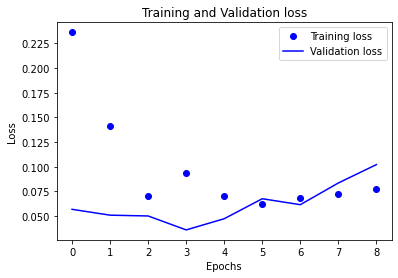

7/7 [==============================] - 0s 7ms/step


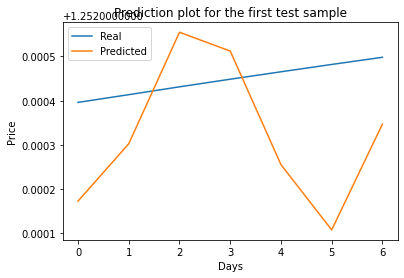

Day 1: 7.767385963723378e-07
Day 2: 5.124795021436956e-07
Day 3: 4.3387625986204735e-07
Day 4: 4.827056047781651e-07
Day 5: 8.678199441021208e-07
Day 6: 8.940703680164153e-07
Day 7: 8.24861431219164e-07
Overall Mean Squared Error: 6.846502437848494e-07


In [289]:
# Apply early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot the training and validation loss curves
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions using the trained model on the test data
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)

# Calculate the mean squared error for each day
mse_by_day = mean_squared_error(real_prices, predicted_prices, multioutput='raw_values')

# Create a DataFrame with the real and predicted prices for the first test sample
forex = pd.DataFrame({
    "Real": real_prices[0],
    "Predicted": predicted_prices[0]
})

# Plot the real and predicted prices for the first test sample
plot = forex.plot.line()
plot.set_title(f'Prediction plot for the first test sample')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Print the mean squared error for each day
for i, mse in enumerate(mse_by_day):
    print(f"Day {i + 1}: {mse}")

# Calculate and print the overall mean squared error
overall_mse = mean_squared_error(real_prices, predicted_prices)
print(f"Overall Mean Squared Error: {overall_mse}")

1/1 [==============================] - 0s 17ms/step


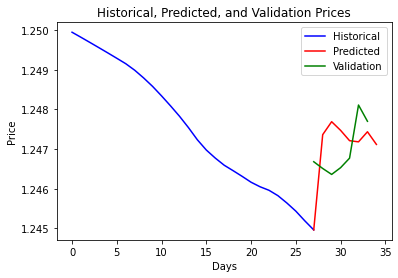

In [290]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

GBPUSD_M5_202304141535_202304242355 = validation_dataframes_M5['GBPUSD_M5_202304141535_202304242355']
GBPUSD_M5_202304141535_202304242355 = GBPUSD_M5_202304141535_202304242355.head(7)

# Make predictions using the trained model on the last window of historical data
last_window = X[-1].reshape(1, window_size, len(feature_columns))
predicted_future = model.predict(last_window)
predicted_future_prices = scaler.inverse_transform(predicted_future)

# Create a DataFrame with the historical data
historical_data = data.iloc[:, target_column].values[-window_size:]
historical_df = pd.DataFrame({
    "Price": historical_data,
    "Type": "Historical"
})

# Create a DataFrame with the predicted future data
predicted_data = np.concatenate((historical_data[-1:], predicted_future_prices.ravel()))
predicted_df = pd.DataFrame({
    "Price": predicted_data,
    "Type": "Predicted"
}, index=range(len(historical_data) - 1, len(historical_data) + future_days))

# Extract validation data from the provided variable
validation_data = GBPUSD_M5_202304141535_202304242355.iloc[:, target_column].values

# Create a DataFrame with the validation data
validation_df = pd.DataFrame({
    "Price": validation_data,
    "Type": "Validation"
}, index=range(len(historical_data) - 1, len(historical_data) - 1 + len(validation_data)))

# Concatenate historical, predicted, and validation DataFrames
historical_predicted_validation = pd.concat([historical_df, predicted_df, validation_df], axis=0)

# Plot the historical, predicted, and validation data
ax = historical_predicted_validation[historical_predicted_validation['Type'] == 'Historical']['Price'].plot(color='blue', label='Historical')
historical_predicted_validation[historical_predicted_validation['Type'] == 'Predicted']['Price'].plot(color='red', label='Predicted', ax=ax)
historical_predicted_validation[historical_predicted_validation['Type'] == 'Validation']['Price'].plot(color='green', label='Validation', ax=ax)
plt.title('Historical, Predicted, and Validation Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [291]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming real_prices and predicted_prices have the correct values
mae = mean_absolute_error(real_prices, predicted_prices)
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"R-squared: {r2}")

# Extract the predicted and validation prices for each day
predicted_daily_prices = predicted_future_prices[:future_days].reshape(-1, 1)
validation_daily_prices = validation_data[:future_days].reshape(-1, 1)

# Calculate the metrics for each day
for i in range(len(predicted_daily_prices)):
    mae = mean_absolute_error(validation_daily_prices[i], predicted_daily_prices[i])
    mse = mean_squared_error(validation_daily_prices[i], predicted_daily_prices[i])
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(validation_daily_prices[i], predicted_daily_prices[i])

    print(f"Day {i + 1}:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape}") 
    # print(f"  Accuracy: {accuracy}%")

Mean Absolute Error: 0.0007040718479359198
Mean Squared Error: 6.846502437848494e-07
Root Mean Squared Error: 0.0008274359454271065
Mean Absolute Percentage Error: 0.056230733285776865
R-squared: 0.8375831851100803
Day 1:
  Mean Absolute Error (MAE): 0.0006826136779785053
  Mean Squared Error (MSE): 4.6596143336334244e-07
  Root Mean Squared Error (RMSE): 0.0006826136779785053
  Mean Absolute Percentage Error (MAPE): 0.05475452224937476
Day 2:
  Mean Absolute Error (MAE): 0.001179485549926751
  Mean Squared Error (MSE): 1.39118616248601e-06
  Root Mean Squared Error (RMSE): 0.001179485549926751
  Mean Absolute Percentage Error (MAPE): 0.09462303149808271
Day 3:
  Mean Absolute Error (MAE): 0.0011108557128907126
  Mean Squared Error (MSE): 1.2340004148619333e-06
  Root Mean Squared Error (RMSE): 0.0011108557128907126
  Mean Absolute Percentage Error (MAPE): 0.08912799776073628
Day 4:
  Mean Absolute Error (MAE): 0.000680979461670006
  Mean Squared Error (MSE): 4.637330272163712e-07
  Ro

**USDCHF_M5**

In [292]:
# data = ta_data_USDCHF
# Uncomment for Prediction using Denoised OHLC + TA values 
data = ta_denoised_data_USDCHF

# Window size for tuning
window_size = 28
# Number of future days to predict
future_days = 7

# Set up window for rolling data
def window_data(data, window, feature_col_numbers, target_col_number):
    X = []
    y = []
    for i in range(len(data) - window - future_days):
        features = data.iloc[i:(i + window), feature_col_numbers]
        target = data.iloc[(i + window):(i + window + future_days), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, future_days)

# Features with high correlation for pure data
# feature_columns = [1,2,3,4,9,28,29,30,33,37,38,39]

# Features with high correlation for Wavelet Denoised data
feature_columns = [0,1,2,3,8,27,28,29,32,36,37,38]

# target_column = 4 # Close value

target_column = 3 # Close value for Denoised Data

# Prepare the input and output arrays for the LSTM model
X, y = window_data(data, window_size, feature_columns, target_column)

# Scale the data using StandardScaler (Z-score normalization)
scaler = StandardScaler()
X = X.reshape(X.shape[0], -1)
X = scaler.fit_transform(X)
X = X.reshape(X.shape[0], window_size, len(feature_columns))

# # Scale the data using MinMaxScaler
# scaler = MinMaxScaler()
# X = X.reshape(X.shape[0], -1)
# X = scaler.fit_transform(X)
# X = X.reshape(X.shape[0], window_size, len(feature_columns))

scaler.fit(y)
y = scaler.transform(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

def impute_missing_values(X):
    for i in range(X.shape[2]):
        feature_values = X[:, :, i].flatten()
        feature_mean = np.nanmean(feature_values)
        feature_isnan = np.isnan(X[:, :, i])
        X[:, :, i][feature_isnan] = feature_mean
    return X

X_train = impute_missing_values(X_train)
X_test = impute_missing_values(X_test)

print(np.isnan(X_train).any())

print(f"Target variable: {data.columns[target_column]}")
print("Selected features:")
for col in feature_columns:
    print(data.columns[col])

False
Target variable: close_wave
Selected features:
open_wave
high_wave
low_wave
close_wave
KAMA
bb_bbm
bb_bbh
bb_bbl
EMA
SMA13
SMA21
SMA34


Epoch 1/50
49/49 [==============================] - 1s 20ms/step - loss: 0.2867 - val_loss: 0.0912
Epoch 2/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1586 - val_loss: 0.0950
Epoch 3/50
49/49 [==============================] - 1s 20ms/step - loss: 0.1117 - val_loss: 0.0790
Epoch 4/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0852 - val_loss: 0.0703
Epoch 5/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0649 - val_loss: 0.0846
Epoch 6/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0606 - val_loss: 0.0965
Epoch 7/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0480 - val_loss: 0.1001
Epoch 8/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0497 - val_loss: 0.0848
Epoch 9/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0648 - val_loss: 0.0820


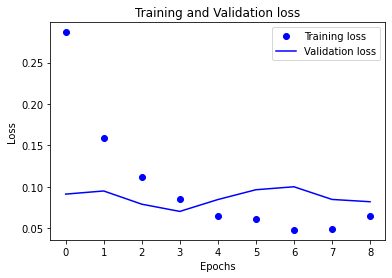

7/7 [==============================] - 0s 7ms/step


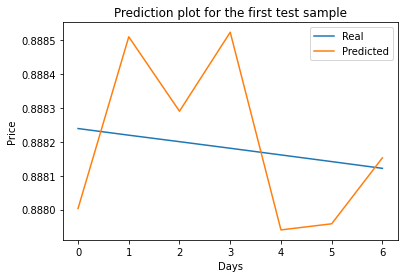

Day 1: 1.637378734362353e-06
Day 2: 2.123948151761372e-06
Day 3: 2.338628677830081e-06
Day 4: 2.889651588478969e-06
Day 5: 3.313443252861596e-06
Day 6: 3.928484822784572e-06
Day 7: 4.6263743667102725e-06
Overall Mean Squared Error: 2.979701370684173e-06


In [293]:
# Apply early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot the training and validation loss curves
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions using the trained model on the test data
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)

# Calculate the mean squared error for each day
mse_by_day = mean_squared_error(real_prices, predicted_prices, multioutput='raw_values')

# Create a DataFrame with the real and predicted prices for the first test sample
forex = pd.DataFrame({
    "Real": real_prices[0],
    "Predicted": predicted_prices[0]
})

# Plot the real and predicted prices for the first test sample
plot = forex.plot.line()
plot.set_title(f'Prediction plot for the first test sample')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Print the mean squared error for each day
for i, mse in enumerate(mse_by_day):
    print(f"Day {i + 1}: {mse}")

# Calculate and print the overall mean squared error
overall_mse = mean_squared_error(real_prices, predicted_prices)
print(f"Overall Mean Squared Error: {overall_mse}")

1/1 [==============================] - 0s 17ms/step


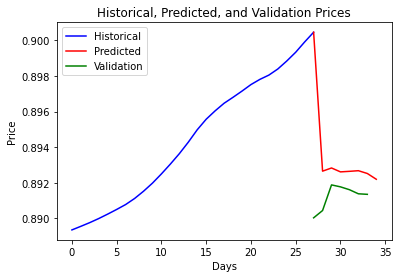

In [294]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

USDCHF_M5_202304141535_202304242355 = validation_dataframes_M5['USDCHF_M5_202304141535_202304242355']
USDCHF_M5_202304141535_202304242355 = USDCHF_M5_202304141535_202304242355.head(7)

# Make predictions using the trained model on the last window of historical data
last_window = X[-1].reshape(1, window_size, len(feature_columns))
predicted_future = model.predict(last_window)
predicted_future_prices = scaler.inverse_transform(predicted_future)

# Create a DataFrame with the historical data
historical_data = data.iloc[:, target_column].values[-window_size:]
historical_df = pd.DataFrame({
    "Price": historical_data,
    "Type": "Historical"
})

# Create a DataFrame with the predicted future data
predicted_data = np.concatenate((historical_data[-1:], predicted_future_prices.ravel()))
predicted_df = pd.DataFrame({
    "Price": predicted_data,
    "Type": "Predicted"
}, index=range(len(historical_data) - 1, len(historical_data) + future_days))

# Extract validation data from the provided variable
validation_data = USDCHF_M5_202304141535_202304242355.iloc[:, target_column].values

# Create a DataFrame with the validation data
validation_df = pd.DataFrame({
    "Price": validation_data,
    "Type": "Validation"
}, index=range(len(historical_data) - 1, len(historical_data) - 1 + len(validation_data)))

# Concatenate historical, predicted, and validation DataFrames
historical_predicted_validation = pd.concat([historical_df, predicted_df, validation_df], axis=0)

# Plot the historical, predicted, and validation data
ax = historical_predicted_validation[historical_predicted_validation['Type'] == 'Historical']['Price'].plot(color='blue', label='Historical')
historical_predicted_validation[historical_predicted_validation['Type'] == 'Predicted']['Price'].plot(color='red', label='Predicted', ax=ax)
historical_predicted_validation[historical_predicted_validation['Type'] == 'Validation']['Price'].plot(color='green', label='Validation', ax=ax)
plt.title('Historical, Predicted, and Validation Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [295]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming real_prices and predicted_prices have the correct values
mae = mean_absolute_error(real_prices, predicted_prices)
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"R-squared: {r2}")

# Extract the predicted and validation prices for each day
predicted_daily_prices = predicted_future_prices[:future_days].reshape(-1, 1)
validation_daily_prices = validation_data[:future_days].reshape(-1, 1)

# Calculate the metrics for each day
for i in range(len(predicted_daily_prices)):
    mae = mean_absolute_error(validation_daily_prices[i], predicted_daily_prices[i])
    mse = mean_squared_error(validation_daily_prices[i], predicted_daily_prices[i])
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(validation_daily_prices[i], predicted_daily_prices[i])

    print(f"Day {i + 1}:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape}") 
    # print(f"  Accuracy: {accuracy}%")

Mean Absolute Error: 0.0009577895146857236
Mean Squared Error: 2.979701370684173e-06
Root Mean Squared Error: 0.001726181152337197
Mean Absolute Percentage Error: 0.1074408490259187
R-squared: 0.49553080097885516
Day 1:
  Mean Absolute Error (MAE): 0.0026220347595214966
  Mean Squared Error (MSE): 6.8750662801389525e-06
  Root Mean Squared Error (RMSE): 0.0026220347595214966
  Mean Absolute Percentage Error (MAPE): 0.29460071677600713
Day 2:
  Mean Absolute Error (MAE): 0.0023904910659789946
  Mean Squared Error (MSE): 5.71444753652539e-06
  Root Mean Squared Error (RMSE): 0.0023904910659789946
  Mean Absolute Percentage Error (MAPE): 0.26846177911807584
Day 3:
  Mean Absolute Error (MAE): 0.0007311459732055603
  Mean Squared Error (MSE): 5.345744341347059e-07
  Root Mean Squared Error (RMSE): 0.0007311459732055603
  Mean Absolute Percentage Error (MAPE): 0.08197806579422795
Day 4:
  Mean Absolute Error (MAE): 0.0008721403884888179
  Mean Squared Error (MSE): 7.606288572334262e-07
  Ro

**USDJPY_M5**

In [296]:
# data = ta_data_USDJPY
# Uncomment for Prediction using Denoised OHLC + TA values 
data = ta_denoised_data_USDJPY

# Window size for tuning
window_size = 28
# Number of future days to predict
future_days = 7

# Set up window for rolling data
def window_data(data, window, feature_col_numbers, target_col_number):
    X = []
    y = []
    for i in range(len(data) - window - future_days):
        features = data.iloc[i:(i + window), feature_col_numbers]
        target = data.iloc[(i + window):(i + window + future_days), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, future_days)

# Features with high correlation for pure data
# feature_columns = [1,2,3,4,9,28,29,30,33,37,38,39]

# Features with high correlation for Wavelet Denoised data
feature_columns = [0,1,2,3,8,27,28,29,32,36,37,38]

# target_column = 4 # Close value

target_column = 3 # Close value for Denoised Data

# Prepare the input and output arrays for the LSTM model
X, y = window_data(data, window_size, feature_columns, target_column)

# Scale the data using StandardScaler (Z-score normalization)
scaler = StandardScaler()
X = X.reshape(X.shape[0], -1)
X = scaler.fit_transform(X)
X = X.reshape(X.shape[0], window_size, len(feature_columns))

# # Scale the data using MinMaxScaler
# scaler = MinMaxScaler()
# X = X.reshape(X.shape[0], -1)
# X = scaler.fit_transform(X)
# X = X.reshape(X.shape[0], window_size, len(feature_columns))

scaler.fit(y)
y = scaler.transform(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

def impute_missing_values(X):
    for i in range(X.shape[2]):
        feature_values = X[:, :, i].flatten()
        feature_mean = np.nanmean(feature_values)
        feature_isnan = np.isnan(X[:, :, i])
        X[:, :, i][feature_isnan] = feature_mean
    return X

X_train = impute_missing_values(X_train)
X_test = impute_missing_values(X_test)

print(np.isnan(X_train).any())

print(f"Target variable: {data.columns[target_column]}")
print("Selected features:")
for col in feature_columns:
    print(data.columns[col])

False
Target variable: close_wave
Selected features:
open_wave
high_wave
low_wave
close_wave
KAMA
bb_bbm
bb_bbh
bb_bbl
EMA
SMA13
SMA21
SMA34


Epoch 1/50
49/49 [==============================] - 1s 24ms/step - loss: 0.0683 - val_loss: 0.0601
Epoch 2/50
49/49 [==============================] - 1s 22ms/step - loss: 0.0795 - val_loss: 0.1254
Epoch 3/50
49/49 [==============================] - 1s 21ms/step - loss: 0.0608 - val_loss: 0.0822
Epoch 4/50
49/49 [==============================] - 1s 23ms/step - loss: 0.0571 - val_loss: 0.1539
Epoch 5/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0479 - val_loss: 0.1115
Epoch 6/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0637 - val_loss: 0.1477


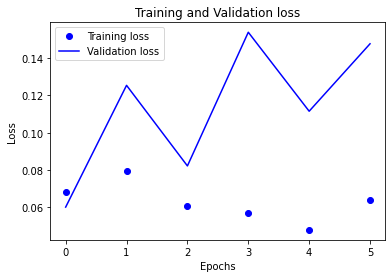

7/7 [==============================] - 0s 7ms/step


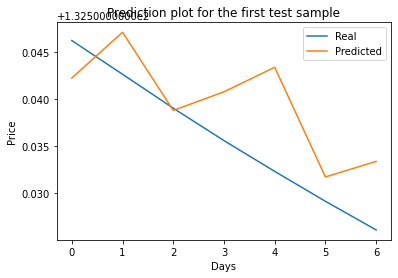

Day 1: 0.00976031335803887
Day 2: 0.010686072566450218
Day 3: 0.009833319927525163
Day 4: 0.011224379767680849
Day 5: 0.011349192988779282
Day 6: 0.013857717292604396
Day 7: 0.014610085333927568
Overall Mean Squared Error: 0.01161729731928662


In [297]:
# Apply early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot the training and validation loss curves
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions using the trained model on the test data
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)

# Calculate the mean squared error for each day
mse_by_day = mean_squared_error(real_prices, predicted_prices, multioutput='raw_values')

# Create a DataFrame with the real and predicted prices for the first test sample
forex = pd.DataFrame({
    "Real": real_prices[0],
    "Predicted": predicted_prices[0]
})

# Plot the real and predicted prices for the first test sample
plot = forex.plot.line()
plot.set_title(f'Prediction plot for the first test sample')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Print the mean squared error for each day
for i, mse in enumerate(mse_by_day):
    print(f"Day {i + 1}: {mse}")

# Calculate and print the overall mean squared error
overall_mse = mean_squared_error(real_prices, predicted_prices)
print(f"Overall Mean Squared Error: {overall_mse}")

1/1 [==============================] - 0s 42ms/step


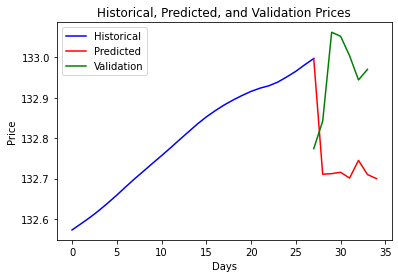

In [298]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

USDJPY_M5_202304141535_202304242355 = validation_dataframes_M5['USDJPY_M5_202304141535_202304242355']
USDJPY_M5_202304141535_202304242355 = USDJPY_M5_202304141535_202304242355.head(7)

# Make predictions using the trained model on the last window of historical data
last_window = X[-1].reshape(1, window_size, len(feature_columns))
predicted_future = model.predict(last_window)
predicted_future_prices = scaler.inverse_transform(predicted_future)

# Create a DataFrame with the historical data
historical_data = data.iloc[:, target_column].values[-window_size:]
historical_df = pd.DataFrame({
    "Price": historical_data,
    "Type": "Historical"
})

# Create a DataFrame with the predicted future data
predicted_data = np.concatenate((historical_data[-1:], predicted_future_prices.ravel()))
predicted_df = pd.DataFrame({
    "Price": predicted_data,
    "Type": "Predicted"
}, index=range(len(historical_data) - 1, len(historical_data) + future_days))

# Extract validation data from the provided variable
validation_data = USDJPY_M5_202304141535_202304242355.iloc[:, target_column].values

# Create a DataFrame with the validation data
validation_df = pd.DataFrame({
    "Price": validation_data,
    "Type": "Validation"
}, index=range(len(historical_data) - 1, len(historical_data) - 1 + len(validation_data)))

# Concatenate historical, predicted, and validation DataFrames
historical_predicted_validation = pd.concat([historical_df, predicted_df, validation_df], axis=0)

# Plot the historical, predicted, and validation data
ax = historical_predicted_validation[historical_predicted_validation['Type'] == 'Historical']['Price'].plot(color='blue', label='Historical')
historical_predicted_validation[historical_predicted_validation['Type'] == 'Predicted']['Price'].plot(color='red', label='Predicted', ax=ax)
historical_predicted_validation[historical_predicted_validation['Type'] == 'Validation']['Price'].plot(color='green', label='Validation', ax=ax)
plt.title('Historical, Predicted, and Validation Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [299]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming real_prices and predicted_prices have the correct values
mae = mean_absolute_error(real_prices, predicted_prices)
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"R-squared: {r2}")

# Extract the predicted and validation prices for each day
predicted_daily_prices = predicted_future_prices[:future_days].reshape(-1, 1)
validation_daily_prices = validation_data[:future_days].reshape(-1, 1)

# Calculate the metrics for each day
for i in range(len(predicted_daily_prices)):
    mae = mean_absolute_error(validation_daily_prices[i], predicted_daily_prices[i])
    mse = mean_squared_error(validation_daily_prices[i], predicted_daily_prices[i])
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(validation_daily_prices[i], predicted_daily_prices[i])

    print(f"Day {i + 1}:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape}") 
    # print(f"  Accuracy: {accuracy}%")

Mean Absolute Error: 0.08686987278737814
Mean Squared Error: 0.01161729731928662
Root Mean Squared Error: 0.10778356701875579
Mean Absolute Percentage Error: 0.06554703221209303
R-squared: 0.32792241388624965
Day 1:
  Mean Absolute Error (MAE): 0.06336767578125091
  Mean Squared Error (MSE): 0.004015462333917733
  Root Mean Squared Error (RMSE): 0.06336767578125091
  Mean Absolute Percentage Error (MAPE): 0.047725967268630085
Day 2:
  Mean Absolute Error (MAE): 0.12996386718751296
  Mean Squared Error (MSE): 0.01689060677433351
  Root Mean Squared Error (RMSE): 0.12996386718751296
  Mean Absolute Percentage Error (MAPE): 0.09783341653054978
Day 3:
  Mean Absolute Error (MAE): 0.3465916748046993
  Mean Squared Error (MSE): 0.12012578904392644
  Root Mean Squared Error (RMSE): 0.3465916748046993
  Mean Absolute Percentage Error (MAPE): 0.26047382032789174
Day 4:
  Mean Absolute Error (MAE): 0.350904418945305
  Mean Squared Error (MSE): 0.12313391123534212
  Root Mean Squared Error (RMSE)